<a href="https://colab.research.google.com/github/Sankalpa0011/RNN-LSTM-Sentiment-Analysis-IMDB-Reviews/blob/main/RNN_LSTM_Sentiment_Analysis_IMDB_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Libraries**

In [ ]:
import os
import json

import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

## **Data Collection - Kaggle API**

In [ ]:
kaggle_dictionary = json.load(open('/content/drive/MyDrive/DL Projects/kaggle (2).json'))

In [ ]:
# setup kaggle credentials as environmental variable
os.environ["KAGGLE_USERNAME"] = kaggle_dictionary["username"]
os.environ["KAGGLE_KEY"] = kaggle_dictionary["key"]

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 66% 17.0M/25.7M [00:00<00:00, 71.2MB/s]
100% 25.7M/25.7M [00:00<00:00, 87.5MB/s]


In [ ]:
# unzip the dataset file
from zipfile import ZipFile

with ZipFile("/content/imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
  zip_ref.extractall("/content")

In [ ]:
!ls

 drive	'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip   sample_data


In [ ]:
# Loading the dataset
dataset = pd.read_csv("/content/IMDB Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# shape of dataset
dataset.shape

(50000, 2)

In [ ]:
dataset["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
# label encoding
dataset.replace ({"sentiment":{"positive":1,"negative":0}}, inplace=True)
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
dataset["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

## **Train Test Split**

In [ ]:
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
print(train_data.shape, test_data.shape)

(40000, 2) (10000, 2)


## **Data Preprocessing**

### **Tokenize Text Data**

In [ ]:
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(train_data["review"])

# convert the text data into sequences of integers and pads the sequences to ensure they all have the same length
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [ ]:
print(x_train, x_train.shape)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]] (40000, 200)


In [ ]:
print(x_test, x_test.shape)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]] (10000, 200)


In [ ]:
y_train = train_data["sentiment"]
y_test = test_data["sentiment"]

In [ ]:
y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

## **RNN - LSTM Neural Network**

In [ ]:
# build the model
model = Sequential()

model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))          # input_dim = num_words = 5000 / input_length = maxlen = 200
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))

# compile
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [ ]:
# train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1000/1000 [==============================] - 537s 534ms/step - loss: 0.4694 - accuracy: 0.7806 - val_loss: 0.3263 - val_accuracy: 0.8600
Epoch 2/5
1000/1000 [==============================] - 533s 533ms/step - loss: 0.2974 - accuracy: 0.8825 - val_loss: 0.3046 - val_accuracy: 0.8754
Epoch 3/5
1000/1000 [==============================] - 529s 529ms/step - loss: 0.2401 - accuracy: 0.9080 - val_loss: 0.2995 - val_accuracy: 0.8848
Epoch 4/5
1000/1000 [==============================] - 526s 526ms/step - loss: 0.1966 - accuracy: 0.9284 - val_loss: 0.3063 - val_accuracy: 0.8814
Epoch 5/5
1000/1000 [==============================] - 523s 523ms/step - loss: 0.1640 - accuracy: 0.9408 - val_loss: 0.3853 - val_accuracy: 0.8820


## **Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 25s 79ms/step - loss: 0.3451 - accuracy: 0.8868
Test Loss: 0.3451405167579651
Test Accuracy: 0.8867999911308289


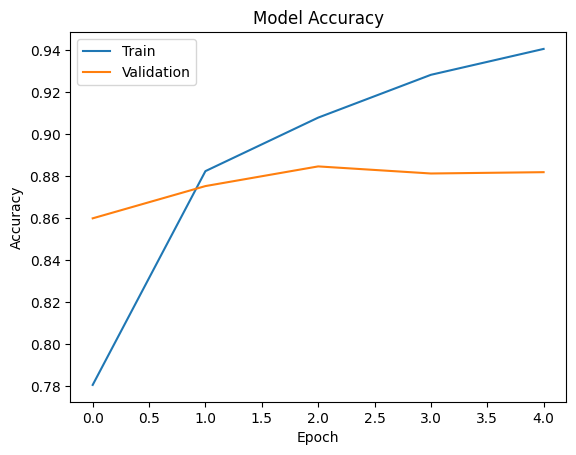

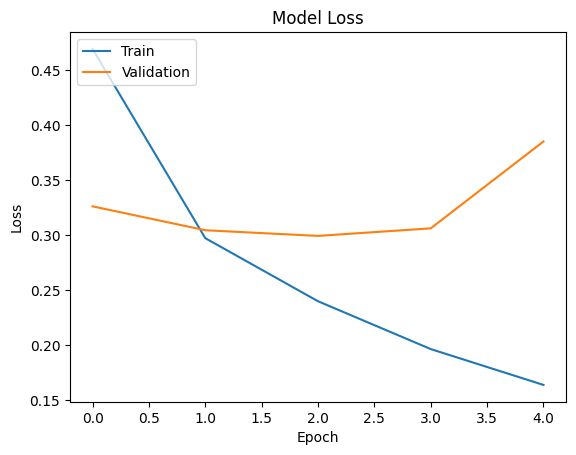

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

## **Predictive System**

In [ ]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])      # convert to sequence of integers , [] is important
  padded_sequence = pad_sequences(sequence, maxlen=200)  # pad the sequence

  # predict the sentiment
  prediction = model.predict(padded_sequence)
  print(prediction)

  # return sentiment
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [ ]:
# example usage
new_review = "This movie was fantastic! I loved every minute of it."
sentiment = predict_sentiment(new_review)
print("Sentiment of the review is: ", sentiment)

1/1 [==============================] - 0s 309ms/step
[[0.9978879]]
Sentiment of the review is:  positive


In [ ]:
# example usage
new_review = "This movie was terrible! I hated every minute of it."
sentiment = predict_sentiment(new_review)
print("Sentiment of the review is: ", sentiment)

1/1 [==============================] - 0s 44ms/step
[[0.00060254]]
Sentiment of the review is:  negative


In [ ]:
model.save("/content/drive/MyDrive/DL Projects/RNN LSTM Sentiment Analysis IMDB Reviews/sentiment_analysis_model.h5")